In [1]:
import pandas as pd
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 300)

In [2]:
all_AVA_muts = pd.read_pickle("../data/4_10_with_uniq_midpts.pkl")
display(len(all_AVA_muts), all_AVA_muts.head())

3921

,index,exp,ale,flask,isolate,tech_rep,presence,Position,Mutation Type,Sequence Change,Details,mutation target annotation,Reference Seq,sample,sample type,exp ALE,coding,range,gene RegulonDB ID,genetic features,oriC,pseudogene,TFBS,promoter,RBS,attenuator terminator,terminator,genetic,genomic features,genetic feature links,operons,operon links,regulators,regulator links,pathways,pathway links,COGs,COG links,temperature,carbon-source,supplement,strain-description,taxonomy-id,base-media,nitrogen-source,phosphorous-source,sulfur-source,calcium-source
0,9,42C,1,124,1,1,1.0,702352,DEL,Δ21 bp,coding (380‑400/1149 nt),nagA,NaN,1 124 1 1,clone,42C 1,True,"(702352, 702372)",{ECK120000625},"[{'name': 'nagA', 'RegulonDB ID': 'ECK12000062...",False,False,{},{},{},{},{},True,"[{'name': 'nagA', 'RegulonDB ID': 'ECK12000062...",{'ECK120000625': ['ECK120000625']},"[{'name': 'nagBAC-umpH', 'RegulonDB ID': 'ECK1...",{'ECK125162049': ['ECK120000625']},"[{'name': 'PhoP', 'significantly associated co...","{'PhoP': ['ECK125162049'], 'CRP': ['ECK1251620...","[{'name': 'Galactose metabolism', 'significant...","{'Galactose metabolism': ['ECK125162049'], 'Am...",[{'name': 'Carbohydrate transport and metaboli...,{'Carbohydrate transport and metabolism': ['EC...,42 celsius,glucose(4),NaCl(0.5g/L) trace elements,WT,511145,M9,NH4Cl(1),KH2PO4(3) Na2HPO4(6.8),MgSO4(0.24),CaCl2(0.1)
1,10,42C,1,124,1,1,1.0,1308318,SNP,G→C,R110G (CGT→GGT),clsA,NaN,1 124 1 1,clone,42C 1,True,"(1308318, 1308318)",{ECK120001556},"[{'name': 'clsA', 'RegulonDB ID': 'ECK12000155...",False,False,{},{},{},{},{},True,"[{'name': 'clsA', 'RegulonDB ID': 'ECK12000155...",{'ECK120001556': ['ECK120001556']},"[{'name': 'clsA-yciU', 'RegulonDB ID': 'ECK125...",{'ECK125147415': ['ECK120001556']},[],{},[],{},[{'name': 'Lipid transport and metabolism'}],{'Lipid transport and metabolism': ['ECK125147...,42 celsius,glucose(4),NaCl(0.5g/L) trace elements,WT,511145,M9,NH4Cl(1),KH2PO4(3) Na2HPO4(6.8),MgSO4(0.24),CaCl2(0.1)
2,11,42C,1,124,1,1,1.0,3815859,DEL,Δ82 bp,None,rph,NaN,1 124 1 1,clone,42C 1,True,"(3815859, 3815940)",{ECK120000854},"[{'name': 'rph', 'RegulonDB ID': 'ECK120000854...",False,False,{},{},{},{ECK125144791},{},True,"[{'name': 'rph-pyrE attenuator terminator', 'R...","{'ECK120000854': ['ECK120000854'], 'ECK1200007...","[{'name': 'rph-pyrE', 'RegulonDB ID': 'ECK1200...","{'ECK120014627': ['ECK120000854', 'ECK12000079...",[],{},"[{'name': 'Pyrimidine metabolism', 'significan...","{'Pyrimidine metabolism': ['ECK120014627'], 'D...",[{'name': 'Nucleotide transport and metabolism'}],{'Nucleotide transport and metabolism': ['ECK1...,42 celsius,glucose(4),NaCl(0.5g/L) trace elements,WT,511145,M9,NH4Cl(1),KH2PO4(3) Na2HPO4(6.8),MgSO4(0.24),CaCl2(0.1)
3,12,42C,1,124,1,1,1.0,4187550,SNP,C→T,A734V (GCG→GTG),rpoC,NaN,1 124 1 1,clone,42C 1,True,"(4187550, 4187550)",{ECK120000886},"[{'name': 'rpoC', 'RegulonDB ID': 'ECK12000088...",False,False,{},{},{},{},{},True,"[{'name': 'rpoC', 'RegulonDB ID': 'ECK12000088...",{'ECK120000886': ['ECK120000886']},"[{'name': 'rplKAJL-rpoBC', 'RegulonDB ID': 'EC...",{'ECK120016992': ['ECK120000886']},[],{},"[{'name': 'Purine metabolism', 'significantly ...","{'Purine metabolism': ['ECK120016992'], 'Pyrim...",[{'name': 'Transcription'}],{'Transcription': ['ECK120016992']},42 celsius,glucose(4),NaCl(0.5g/L) trace elements,WT,511145,M9,NH4Cl(1),KH2PO4(3) Na2HPO4(6.8),MgSO4(0.24),CaCl2(0.1)
4,13,42C,1,124,1,1,1.0,4400313,SNP,A→C,D9A (GAT→GCT),hfq,NaN,1 124 1 1,clone,42C 1,True,"(4400313, 4400313)",{ECK120000431},"[{'name': 'hfq', 'RegulonDB ID': 'ECK120000431...",False,False,{},{},{},{},{},True,"[{'name': 'hfq', 'RegulonDB ID': 'ECK120000431...",{'ECK120000431': ['ECK120000431']},[{'name': 'yjeF-tsaE-amiB-mutL-miaA-hfq-hflXKC...,{'ECK125147410': ['ECK120000431']},"[{'name': 'CRP', 'significantly associated con...",{'CRP': ['ECK125147410']},[],{},[{'name': 'Signal transduction mechanisms'}],{'Signal transduction mechanisms': ['ECK125147...,42 celsius,glucose(4),NaCl(0.5g/

In [3]:
import os, sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from mutil.mut import get_mut_size

# disregarding all deletions of size > 1000 bp (about the size of a gene) since these mutations don't contribute to design and only inflate mutation counts to systems leading to false positives.
all_AVA_muts["mutation size"] = all_AVA_muts.apply(get_mut_size, axis=1)
all_AVA_muts = all_AVA_muts[~((all_AVA_muts["Mutation Type"]=="DEL") & (all_AVA_muts["mutation size"]>1000))].copy()
len(all_AVA_muts)

3867

In [4]:
all_AVA_muts["exp ale"] = all_AVA_muts.apply(lambda m: m["exp"] + ' ' + str(int(m["ale"])), axis=1)

In [5]:
FEATURE_TYPES = [
    "genomic features",
    "operons",
    "pathways",
#     "imodulons",
    "regulators",
#     "EC numbers",
#     "products"
]

In [6]:
# # preprocessing
# ft_feat_d = {ft:dict() for ft in FEATURE_TYPES}
# for _, m in all_AVA_muts.iterrows():
#     for ft in FEATURE_TYPES:
#         for f in m[ft]:
#             if (str(f["name"]) != "nan") & (f["name"] not in feat_pen_d[ft].keys()):
#                 feat_pen_d[ft][f["name"]] = []
# # ft_feat_d

In [7]:
def get_expanded_feat_type(given_feat_type, feat_d):
    ft = given_feat_type
    if ft == "genomic features":
        ft = feat_d["feature type"]
        if ft == "unknown":
            ft = "intergenic" 
    
    return ft

In [8]:
# preprocessing
# ft_feat_d = {ft:dict() for ft in FEATURE_TYPES}
ft_feat_d = {}
for _, m in all_AVA_muts.iterrows():
    for ft in FEATURE_TYPES:
        for f in m[ft]:
            
            out_ft = get_expanded_feat_type(ft, f)
            if out_ft not in ft_feat_d.keys():  # Since ft_feat_d is empty by default, need to add first dict layer before adding 2nd layer for specific feature
                    ft_feat_d[out_ft] = {}
            
            if (str(f["name"]) != "nan") & (f["name"] not in ft_feat_d[out_ft].keys()):
                ft_feat_d[out_ft][f["name"]] = []
ft_feat_d.keys()

dict_keys(['gene', 'operons', 'pathways', 'regulators', 'attenuator terminator', 'intergenic', 'promoter', 'TFBS', 'terminator', 'RBS'])

In [9]:
# for exp, exp_mut_df in all_AVA_muts.groupby("exp"):
    
#     exp_feat_ale_d = {ft:dict() for ft in FEATURE_TYPES}
#     for _, m in exp_mut_df.iterrows():
#         z
#         for ft in FEATURE_TYPES:
#             for f in m[ft]:
#                 if str(f["name"]) != "nan":
#                     if f["name"] not in exp_feat_ale_d[ft].keys():
#                         exp_feat_ale_d[ft][f["name"]] = set()
#                     exp_feat_ale_d[ft][f["name"]].add(m["exp ale"])          
    
#     for ft in FEATURE_TYPES:
#         for f, feat_exp_ales in exp_feat_ale_d[ft].items():
#             feat_exp_pen = len(feat_exp_ales) / len(exp_mut_df["exp ale"].unique())
#             if feat_exp_pen > 0:
#                 ft_feat_d[ft][f].append(feat_exp_pen)

In [10]:
import copy
feat_pen_d = copy.deepcopy(ft_feat_d)

for exp, exp_mut_df in all_AVA_muts.groupby("exp"):
    
#     exp_feat_ale_d = {ft:dict() for ft in FEATURE_TYPES}
    exp_feat_ale_d = dict()
    for _, m in exp_mut_df.iterrows():
        
        for ft in FEATURE_TYPES:  # must use regular feature types since the mutation rows don't differentiate between sub "genomic feature" types (gene, TFBS, etc)
            for f in m[ft]:
                
                updt_ft = get_expanded_feat_type(ft, f)
                if updt_ft not in exp_feat_ale_d.keys():  # Since feat_pen_d is empty by default, need to add first dict layer before adding 2nd layer for specific feature
                    exp_feat_ale_d[updt_ft] = {}
                
                if str(f["name"]) != "nan":  # Maybe test for this earlier in the iteration to avoid unnecessary executions.
                    if f["name"] not in exp_feat_ale_d[updt_ft].keys():
                        exp_feat_ale_d[updt_ft][f["name"]] = set()
                    exp_feat_ale_d[updt_ft][f["name"]].add(m["exp ale"])          
#     display(exp_feat_ale_d)
    
    for updt_ft in exp_feat_ale_d.keys():
        for f, feat_exp_ales in exp_feat_ale_d[updt_ft].items():
            feat_exp_pen = len(feat_exp_ales) / len(exp_mut_df["exp ale"].unique())
            if feat_exp_pen > 0:
                feat_pen_d[updt_ft][f].append(feat_exp_pen)

# testing to make sure that all individual features are getting penetrance values
for ft, fd in feat_pen_d.items():
    for fn, pens in fd.items():
        assert(len(pens) > 0)                

# feat_pen_d

In [11]:
# from statistics import median

feat_avg_pen_d = {ft:dict() for ft in feat_pen_d.keys()}
for ft in feat_pen_d.keys():
    for f, pens in feat_pen_d[ft].items():
#         feat_avg_pen_d[ft][f] = median(pens)
        feat_avg_pen_d[ft][f] = sum(pens) / len(pens)
# feat_avg_pen_d

In [12]:
# I want sets for counting unique experiments
import copy
feat_exp_d = copy.deepcopy(ft_feat_d)
for d in feat_exp_d.values():
    for k, v in d.items():
        d[k] = set()
# feat_exp_d

for _, m in all_AVA_muts.iterrows():
    for ft in FEATURE_TYPES:  # must use regular feature types since the mutation rows don't differentiate between sub "genomic feature" types (gene, TFBS, etc)
        for f in m[ft]:
            if str(f["name"]) != "nan":
                updt_ft = get_expanded_feat_type(ft, f)
                feat_exp_d[updt_ft][f["name"]].add(m["exp"])
# feat_exp_d

In [13]:
mat = pd.DataFrame()
for _, m in all_AVA_muts.iterrows():
    for ft in FEATURE_TYPES:
        links_already_counted_for = set()
        for f in m[ft]:  # must use regular feature types since the mutation rows don't differentiate between sub "genomic feature" types (gene, TFBS, etc)
            if str(f["name"]) != "nan":  # !!! only counting features with names. This could lead to slightly inaccurate results.
                
                mat_index = str(f["name"])
                updt_ft = get_expanded_feat_type(ft, f)
                if ft != "genomic features":
                    mat_index = mat_index + ' ' + updt_ft[:-1]
                
                # columns that can be immediately populated
                if mat_index not in mat.index:
                    avg_pen = feat_avg_pen_d[updt_ft][f["name"]]
                    srs = pd.Series({
                        "feature type": updt_ft,
                        "experiment count": len(feat_exp_d[updt_ft][f["name"]]),
                        "average convergence": avg_pen,  # only needs to be recorded once
                        "ALE-unique mutation count": 0})  # setting up for later cells to populate
                    srs.name = mat_index
                    mat = mat.append(srs)
                
                if ft == "genomic features":
                    mat.at[mat_index, "ALE-unique mutation count"] += 1 # add count every time come across feature type
                else:  # have to count their links, not simply the occurence.
                    if f['name'] not in links_already_counted_for:  # so as to not double-count feature links
                        links_already_counted_for.add(f['name'])
                        links_col = ft[:-1] + " links"
                        link_key = f['name']
                        if ft == "operons":
                            link_key = f['RegulonDB ID']

                        try:
                            mat.at[mat_index, "ALE-unique mutation count"] += len(m[links_col][link_key]) # add count every time come across feature type
                        except:
                            display(link_key, m[ft], m[links_col])  # Any output from this should be addressed by ASW-2254
                        
mat.index = mat.apply(lambda r: str(r.name).replace("regulator", "regulon") if r["feature type"] == "regulators" else r.name, axis=1)  # some products have "regulator" in their name
mat['experiment count'] = mat['experiment count'].astype(int)
mat['ALE-unique mutation count'] = mat['ALE-unique mutation count'].astype(int)
mat

'ECK120014729'

[{'name': 'gltBDF',
  'RegulonDB ID': 'ECK120014729',
  'range': (3354148, 3361940),
  'significantly associated conditions': set()}]

{}

'HdfR'

[{'name': 'HdfR', 'significantly associated conditions': set()},
 {'name': 'IHF', 'significantly associated conditions': set()},
 {'name': 'FNR', 'significantly associated conditions': set()},
 {'name': 'AdiY',
  'significantly associated conditions': {'CaCl2(0.1)',
   'KH2PO4(3) Na2HPO4(6.8)',
   'M9',
   'MgSO4(0.24)',
   'NH4Cl(1)',
   'NaCl(0.5g/L) trace elements',
   'glucose(4)'}},
 {'name': 'Lrp',
  'significantly associated conditions': {'NH4Cl(1)',
   'NaCl(0.5g/L) trace elements'}},
 {'name': 'ArgR', 'significantly associated conditions': set()},
 {'name': 'CRP', 'significantly associated conditions': set()},
 {'name': 'Fur', 'significantly associated conditions': {'P. aerophilum pgi'}},
 {'name': 'GadE',
  'significantly associated conditions': {'CaCl2(0.1)',
   'KH2PO4(3) Na2HPO4(6.8)',
   'M9',
   'MgSO4(0.24)',
   'NH4Cl(1)',
   'NaCl(0.5g/L) trace elements',
   'glucose(4)'}},
 {'name': 'Nac',
  'significantly associated conditions': {'NH4Cl(1)',
   'NaCl(0.5g/L) trace e

{}

'IHF'

[{'name': 'HdfR', 'significantly associated conditions': set()},
 {'name': 'IHF', 'significantly associated conditions': set()},
 {'name': 'FNR', 'significantly associated conditions': set()},
 {'name': 'AdiY',
  'significantly associated conditions': {'CaCl2(0.1)',
   'KH2PO4(3) Na2HPO4(6.8)',
   'M9',
   'MgSO4(0.24)',
   'NH4Cl(1)',
   'NaCl(0.5g/L) trace elements',
   'glucose(4)'}},
 {'name': 'Lrp',
  'significantly associated conditions': {'NH4Cl(1)',
   'NaCl(0.5g/L) trace elements'}},
 {'name': 'ArgR', 'significantly associated conditions': set()},
 {'name': 'CRP', 'significantly associated conditions': set()},
 {'name': 'Fur', 'significantly associated conditions': {'P. aerophilum pgi'}},
 {'name': 'GadE',
  'significantly associated conditions': {'CaCl2(0.1)',
   'KH2PO4(3) Na2HPO4(6.8)',
   'M9',
   'MgSO4(0.24)',
   'NH4Cl(1)',
   'NaCl(0.5g/L) trace elements',
   'glucose(4)'}},
 {'name': 'Nac',
  'significantly associated conditions': {'NH4Cl(1)',
   'NaCl(0.5g/L) trace e

{}

'FNR'

[{'name': 'HdfR', 'significantly associated conditions': set()},
 {'name': 'IHF', 'significantly associated conditions': set()},
 {'name': 'FNR', 'significantly associated conditions': set()},
 {'name': 'AdiY',
  'significantly associated conditions': {'CaCl2(0.1)',
   'KH2PO4(3) Na2HPO4(6.8)',
   'M9',
   'MgSO4(0.24)',
   'NH4Cl(1)',
   'NaCl(0.5g/L) trace elements',
   'glucose(4)'}},
 {'name': 'Lrp',
  'significantly associated conditions': {'NH4Cl(1)',
   'NaCl(0.5g/L) trace elements'}},
 {'name': 'ArgR', 'significantly associated conditions': set()},
 {'name': 'CRP', 'significantly associated conditions': set()},
 {'name': 'Fur', 'significantly associated conditions': {'P. aerophilum pgi'}},
 {'name': 'GadE',
  'significantly associated conditions': {'CaCl2(0.1)',
   'KH2PO4(3) Na2HPO4(6.8)',
   'M9',
   'MgSO4(0.24)',
   'NH4Cl(1)',
   'NaCl(0.5g/L) trace elements',
   'glucose(4)'}},
 {'name': 'Nac',
  'significantly associated conditions': {'NH4Cl(1)',
   'NaCl(0.5g/L) trace e

{}

'AdiY'

[{'name': 'HdfR', 'significantly associated conditions': set()},
 {'name': 'IHF', 'significantly associated conditions': set()},
 {'name': 'FNR', 'significantly associated conditions': set()},
 {'name': 'AdiY',
  'significantly associated conditions': {'CaCl2(0.1)',
   'KH2PO4(3) Na2HPO4(6.8)',
   'M9',
   'MgSO4(0.24)',
   'NH4Cl(1)',
   'NaCl(0.5g/L) trace elements',
   'glucose(4)'}},
 {'name': 'Lrp',
  'significantly associated conditions': {'NH4Cl(1)',
   'NaCl(0.5g/L) trace elements'}},
 {'name': 'ArgR', 'significantly associated conditions': set()},
 {'name': 'CRP', 'significantly associated conditions': set()},
 {'name': 'Fur', 'significantly associated conditions': {'P. aerophilum pgi'}},
 {'name': 'GadE',
  'significantly associated conditions': {'CaCl2(0.1)',
   'KH2PO4(3) Na2HPO4(6.8)',
   'M9',
   'MgSO4(0.24)',
   'NH4Cl(1)',
   'NaCl(0.5g/L) trace elements',
   'glucose(4)'}},
 {'name': 'Nac',
  'significantly associated conditions': {'NH4Cl(1)',
   'NaCl(0.5g/L) trace e

{}

'Lrp'

[{'name': 'HdfR', 'significantly associated conditions': set()},
 {'name': 'IHF', 'significantly associated conditions': set()},
 {'name': 'FNR', 'significantly associated conditions': set()},
 {'name': 'AdiY',
  'significantly associated conditions': {'CaCl2(0.1)',
   'KH2PO4(3) Na2HPO4(6.8)',
   'M9',
   'MgSO4(0.24)',
   'NH4Cl(1)',
   'NaCl(0.5g/L) trace elements',
   'glucose(4)'}},
 {'name': 'Lrp',
  'significantly associated conditions': {'NH4Cl(1)',
   'NaCl(0.5g/L) trace elements'}},
 {'name': 'ArgR', 'significantly associated conditions': set()},
 {'name': 'CRP', 'significantly associated conditions': set()},
 {'name': 'Fur', 'significantly associated conditions': {'P. aerophilum pgi'}},
 {'name': 'GadE',
  'significantly associated conditions': {'CaCl2(0.1)',
   'KH2PO4(3) Na2HPO4(6.8)',
   'M9',
   'MgSO4(0.24)',
   'NH4Cl(1)',
   'NaCl(0.5g/L) trace elements',
   'glucose(4)'}},
 {'name': 'Nac',
  'significantly associated conditions': {'NH4Cl(1)',
   'NaCl(0.5g/L) trace e

{}

'ArgR'

[{'name': 'HdfR', 'significantly associated conditions': set()},
 {'name': 'IHF', 'significantly associated conditions': set()},
 {'name': 'FNR', 'significantly associated conditions': set()},
 {'name': 'AdiY',
  'significantly associated conditions': {'CaCl2(0.1)',
   'KH2PO4(3) Na2HPO4(6.8)',
   'M9',
   'MgSO4(0.24)',
   'NH4Cl(1)',
   'NaCl(0.5g/L) trace elements',
   'glucose(4)'}},
 {'name': 'Lrp',
  'significantly associated conditions': {'NH4Cl(1)',
   'NaCl(0.5g/L) trace elements'}},
 {'name': 'ArgR', 'significantly associated conditions': set()},
 {'name': 'CRP', 'significantly associated conditions': set()},
 {'name': 'Fur', 'significantly associated conditions': {'P. aerophilum pgi'}},
 {'name': 'GadE',
  'significantly associated conditions': {'CaCl2(0.1)',
   'KH2PO4(3) Na2HPO4(6.8)',
   'M9',
   'MgSO4(0.24)',
   'NH4Cl(1)',
   'NaCl(0.5g/L) trace elements',
   'glucose(4)'}},
 {'name': 'Nac',
  'significantly associated conditions': {'NH4Cl(1)',
   'NaCl(0.5g/L) trace e

{}

'CRP'

[{'name': 'HdfR', 'significantly associated conditions': set()},
 {'name': 'IHF', 'significantly associated conditions': set()},
 {'name': 'FNR', 'significantly associated conditions': set()},
 {'name': 'AdiY',
  'significantly associated conditions': {'CaCl2(0.1)',
   'KH2PO4(3) Na2HPO4(6.8)',
   'M9',
   'MgSO4(0.24)',
   'NH4Cl(1)',
   'NaCl(0.5g/L) trace elements',
   'glucose(4)'}},
 {'name': 'Lrp',
  'significantly associated conditions': {'NH4Cl(1)',
   'NaCl(0.5g/L) trace elements'}},
 {'name': 'ArgR', 'significantly associated conditions': set()},
 {'name': 'CRP', 'significantly associated conditions': set()},
 {'name': 'Fur', 'significantly associated conditions': {'P. aerophilum pgi'}},
 {'name': 'GadE',
  'significantly associated conditions': {'CaCl2(0.1)',
   'KH2PO4(3) Na2HPO4(6.8)',
   'M9',
   'MgSO4(0.24)',
   'NH4Cl(1)',
   'NaCl(0.5g/L) trace elements',
   'glucose(4)'}},
 {'name': 'Nac',
  'significantly associated conditions': {'NH4Cl(1)',
   'NaCl(0.5g/L) trace e

{}

'Fur'

[{'name': 'HdfR', 'significantly associated conditions': set()},
 {'name': 'IHF', 'significantly associated conditions': set()},
 {'name': 'FNR', 'significantly associated conditions': set()},
 {'name': 'AdiY',
  'significantly associated conditions': {'CaCl2(0.1)',
   'KH2PO4(3) Na2HPO4(6.8)',
   'M9',
   'MgSO4(0.24)',
   'NH4Cl(1)',
   'NaCl(0.5g/L) trace elements',
   'glucose(4)'}},
 {'name': 'Lrp',
  'significantly associated conditions': {'NH4Cl(1)',
   'NaCl(0.5g/L) trace elements'}},
 {'name': 'ArgR', 'significantly associated conditions': set()},
 {'name': 'CRP', 'significantly associated conditions': set()},
 {'name': 'Fur', 'significantly associated conditions': {'P. aerophilum pgi'}},
 {'name': 'GadE',
  'significantly associated conditions': {'CaCl2(0.1)',
   'KH2PO4(3) Na2HPO4(6.8)',
   'M9',
   'MgSO4(0.24)',
   'NH4Cl(1)',
   'NaCl(0.5g/L) trace elements',
   'glucose(4)'}},
 {'name': 'Nac',
  'significantly associated conditions': {'NH4Cl(1)',
   'NaCl(0.5g/L) trace e

{}

'GadE'

[{'name': 'HdfR', 'significantly associated conditions': set()},
 {'name': 'IHF', 'significantly associated conditions': set()},
 {'name': 'FNR', 'significantly associated conditions': set()},
 {'name': 'AdiY',
  'significantly associated conditions': {'CaCl2(0.1)',
   'KH2PO4(3) Na2HPO4(6.8)',
   'M9',
   'MgSO4(0.24)',
   'NH4Cl(1)',
   'NaCl(0.5g/L) trace elements',
   'glucose(4)'}},
 {'name': 'Lrp',
  'significantly associated conditions': {'NH4Cl(1)',
   'NaCl(0.5g/L) trace elements'}},
 {'name': 'ArgR', 'significantly associated conditions': set()},
 {'name': 'CRP', 'significantly associated conditions': set()},
 {'name': 'Fur', 'significantly associated conditions': {'P. aerophilum pgi'}},
 {'name': 'GadE',
  'significantly associated conditions': {'CaCl2(0.1)',
   'KH2PO4(3) Na2HPO4(6.8)',
   'M9',
   'MgSO4(0.24)',
   'NH4Cl(1)',
   'NaCl(0.5g/L) trace elements',
   'glucose(4)'}},
 {'name': 'Nac',
  'significantly associated conditions': {'NH4Cl(1)',
   'NaCl(0.5g/L) trace e

{}

'Nac'

[{'name': 'HdfR', 'significantly associated conditions': set()},
 {'name': 'IHF', 'significantly associated conditions': set()},
 {'name': 'FNR', 'significantly associated conditions': set()},
 {'name': 'AdiY',
  'significantly associated conditions': {'CaCl2(0.1)',
   'KH2PO4(3) Na2HPO4(6.8)',
   'M9',
   'MgSO4(0.24)',
   'NH4Cl(1)',
   'NaCl(0.5g/L) trace elements',
   'glucose(4)'}},
 {'name': 'Lrp',
  'significantly associated conditions': {'NH4Cl(1)',
   'NaCl(0.5g/L) trace elements'}},
 {'name': 'ArgR', 'significantly associated conditions': set()},
 {'name': 'CRP', 'significantly associated conditions': set()},
 {'name': 'Fur', 'significantly associated conditions': {'P. aerophilum pgi'}},
 {'name': 'GadE',
  'significantly associated conditions': {'CaCl2(0.1)',
   'KH2PO4(3) Na2HPO4(6.8)',
   'M9',
   'MgSO4(0.24)',
   'NH4Cl(1)',
   'NaCl(0.5g/L) trace elements',
   'glucose(4)'}},
 {'name': 'Nac',
  'significantly associated conditions': {'NH4Cl(1)',
   'NaCl(0.5g/L) trace e

{}

,ALE-unique mutation count,average convergence,experiment count,feature type
nagA,9,0.250794,6,gene
nagBAC-umpH operon,28,0.356488,10,operons
Galactose metabolism pathway,65,0.436865,15,pathways
Amino sugar and nucleotide sugar metabolism pathway,53,0.404537,20,pathways
PhoP regulon,42,0.312103,20,regulators
...,...,...,...,...
csrA operon,1,1.000000,1,operons
yraK,1,1.000000,1,gene
tufAp1,1,1.000000,1,promoter
fusA,1,1.000000,1,gene


In [14]:
def _get_percentile(r):
    ft_df = mat[mat["feature type"]==r["feature type"]]
    total_ft_set_len = len(ft_df)  # Each row is considered a unique feature (though this will be affected by bug of TFBS and RBS not having unique names (ASW-2145))
    feat_mut_cnt = r["ALE-unique mutation count"]
    ft_cnt_mut_less_than_given = len(ft_df[ft_df["ALE-unique mutation count"] < feat_mut_cnt])
    return ft_cnt_mut_less_than_given / total_ft_set_len


# srs = pd.Series({
#     "feature type": "gene",
#     "ALE-unique mutation count": 5})
# _get_percentile(srs)
mat["feature type percentile"] = mat.apply(lambda f: _get_percentile(f), axis=1)
mat

,ALE-unique mutation count,average convergence,experiment count,feature type,feature type percentile
nagA,9,0.250794,6,gene,0.893368
nagBAC-umpH operon,28,0.356488,10,operons,0.949106
Galactose metabolism pathway,65,0.436865,15,pathways,0.921739
Amino sugar and nucleotide sugar metabolism pathway,53,0.404537,20,pathways,0.878261
PhoP regulon,42,0.312103,20,regulators,0.842105
...,...,...,...,...,...
csrA operon,1,1.000000,1,operons,0.000000
yraK,1,1.000000,1,gene,0.000000
tufAp1,1,1.000000,1,promoter,0.000000
fusA,1,1.000000,1,gene,0.000000


In [15]:
signif_logodds_assoc_mat_files = [
    "../data/assocs/geno_signif_logodds_assoc_mat.pkl",
    "../data/assocs/ops_signif_logodds_assoc_mat.pkl",
    "../data/assocs/pathway_signif_logodds_assoc_mat.pkl",
    "../data/assocs/regs_signif_logodds_assoc_mat.pkl",
]
mat["associated condition count"] = 0
for f in signif_logodds_assoc_mat_files:
    signif_logodds_assoc_mat = pd.read_pickle(f)
    for feat, r, in signif_logodds_assoc_mat.iterrows():
        
        feat_name = feat
#         if "geno_" in f:
#             feat_name += " genomic feature"
        if "ops_" in f:
            feat_name += " operon"
        if "pathway_" in f:
            feat_name += " pathway"
        if "regs_" in f:
            feat_name += " regulon"
        
        if feat_name in mat.index:
            mat.at[feat_name, "associated condition count"] = (r!=0).sum()
mat["associated condition count"] = mat["associated condition count"].astype(int)
mat

,ALE-unique mutation count,average convergence,experiment count,feature type,feature type percentile,associated condition count
nagA,9,0.250794,6,gene,0.893368,2
nagBAC-umpH operon,28,0.356488,10,operons,0.949106,10
Galactose metabolism pathway,65,0.436865,15,pathways,0.921739,8
Amino sugar and nucleotide sugar metabolism pathway,53,0.404537,20,pathways,0.878261,8
PhoP regulon,42,0.312103,20,regulators,0.842105,12
...,...,...,...,...,...,...
csrA operon,1,1.000000,1,operons,0.000000,1
yraK,1,1.000000,1,gene,0.000000,1
tufAp1,1,1.000000,1,promoter,0.000000,1
fusA,1,1.000000,1,gene,0.000000,1


In [16]:
# Adjusting feature type names used
mat["feature type"] = mat["feature type"].astype(str)
mat["feature type"] = mat.apply(lambda r: r["feature type"].replace("regulator", "regulon") , axis=1)
mat["feature type"] = mat.apply(lambda r: r["feature type"][:-1] if r["feature type"][-1] == 's' else r["feature type"] ,axis=1)
mat["feature type"].unique()

array(['gene', 'operon', 'pathway', 'regulon', 'attenuator terminator',
       'intergenic', 'promoter', 'TFBS', 'terminator', 'RBS'],
      dtype=object)

In [17]:
mat["95th percentile\nmutation frequency\nfor feature type"] = mat.apply(lambda f: 1 if f["feature type percentile"] > 0.95 else 0, axis=1)
mat

,ALE-unique mutation count,average convergence,experiment count,feature type,feature type percentile,associated condition count,95th percentile\nmutation frequency\nfor feature type
nagA,9,0.250794,6,gene,0.893368,2,0
nagBAC-umpH operon,28,0.356488,10,operon,0.949106,10,0
Galactose metabolism pathway,65,0.436865,15,pathway,0.921739,8,0
Amino sugar and nucleotide sugar metabolism pathway,53,0.404537,20,pathway,0.878261,8,0
PhoP regulon,42,0.312103,20,regulon,0.842105,12,0
...,...,...,...,...,...,...,...
csrA operon,1,1.000000,1,operon,0.000000,1,0
yraK,1,1.000000,1,gene,0.000000,1,0
tufAp1,1,1.000000,1,promoter,0.000000,1,0
fusA,1,1.000000,1,gene,0.000000,1,0


In [18]:
def _get_ALE_uniq_prop_of_muts_for_feat_type(r):
    ALE_uniq_prop_of_muts_for_feat_type = 0
    
    feat_type = r["feature type"]
    feat = r.name
    ALE_uniq_prop_of_muts_for_feat_type = mat.at[feat,"ALE-unique mutation count"]/(mat[mat["feature type"]==feat_type]["ALE-unique mutation count"].sum())
    
    return ALE_uniq_prop_of_muts_for_feat_type
    

mat["proportion of mutations\nfor feature type"] = mat.apply(lambda r: _get_ALE_uniq_prop_of_muts_for_feat_type(r),axis=1)
mat

,ALE-unique mutation count,average convergence,experiment count,feature type,feature type percentile,associated condition count,95th percentile\nmutation frequency\nfor feature type,proportion of mutations\nfor feature type
nagA,9,0.250794,6,gene,0.893368,2,0,0.002854
nagBAC-umpH operon,28,0.356488,10,operon,0.949106,10,0,0.006668
Galactose metabolism pathway,65,0.436865,15,pathway,0.921739,8,0,0.021856
Amino sugar and nucleotide sugar metabolism pathway,53,0.404537,20,pathway,0.878261,8,0,0.017821
PhoP regulon,42,0.312103,20,regulon,0.842105,12,0,0.008687
...,...,...,...,...,...,...,...,...
csrA operon,1,1.000000,1,operon,0.000000,1,0,0.000238
yraK,1,1.000000,1,gene,0.000000,1,0,0.000317
tufAp1,1,1.000000,1,promoter,0.000000,1,0,0.001618
fusA,1,1.000000,1,gene,0.000000,1,0,0.000317


In [19]:
# These annotations are for the gdmuts MS.
design_feats = [
    "CRP regulon",
    "glpFKX operon",
    "glpK",
    "cyaA operon",
    "cyaA",
    "ptsHI-crr operon",
    "crr",
    "pykF",
    "pykF operon",
    "Purine metabolism pathway",
    "rplKAJL-rpoBC operon",
    "rpoB",
    "rpoC",
    "nagA",
    "nagC",
    "nagBAC-umpH operon"
]
annot_df = mat[mat.index.isin(design_feats)].copy()
annot_df["annot"] = annot_df.index
annot_df["annot"] = annot_df.apply(lambda r: r["annot"].replace("genomic feature", ''), axis=1)
annot_df

,ALE-unique mutation count,average convergence,experiment count,feature type,feature type percentile,associated condition count,95th percentile\nmutation frequency\nfor feature type,proportion of mutations\nfor feature type,annot
nagA,9,0.250794,6,gene,0.893368,2,0,0.002854,nagA
nagBAC-umpH operon,28,0.356488,10,operon,0.949106,10,0,0.006668,nagBAC-umpH operon
CRP regulon,800,0.752813,58,regulon,0.993421,6,1,0.165460,CRP regulon
rpoC,81,0.440426,31,gene,0.996099,15,1,0.025690,rpoC
rplKAJL-rpoBC operon,155,0.614983,41,operon,0.995873,23,1,0.036914,rplKAJL-rpoBC operon
Purine metabolism pathway,357,0.751283,48,pathway,0.982609,22,1,0.120040,Purine metabolism pathway
pykF,31,0.462738,10,gene,0.985696,10,1,0.009832,pykF
pykF operon,34,0.447186,11,operon,0.979367,11,1,0.008097,pykF operon
rpoB,70,0.432239,29,gene,0.994798,21,1,0.022201,rpoB
ptsHI-crr operon,21,0.241071,5,operon,0.933975,9,0,0.005001,ptsHI-crr operon


In [20]:
p = {
    'gene':"#72C4B3",
    'operon':"#A7A0CB",
    'pathway':"#F65E54",
    'regulon':"#FA9A47",
    'attenuator terminator':"#9BD44C",
    'intergenic':"#F9B8DA",
    'promoter':"#CAC9CA",
    'terminator':"#A35DA6",
    'TFBS':"#BAE4B0",
    'RBS':"#FFE953",
}

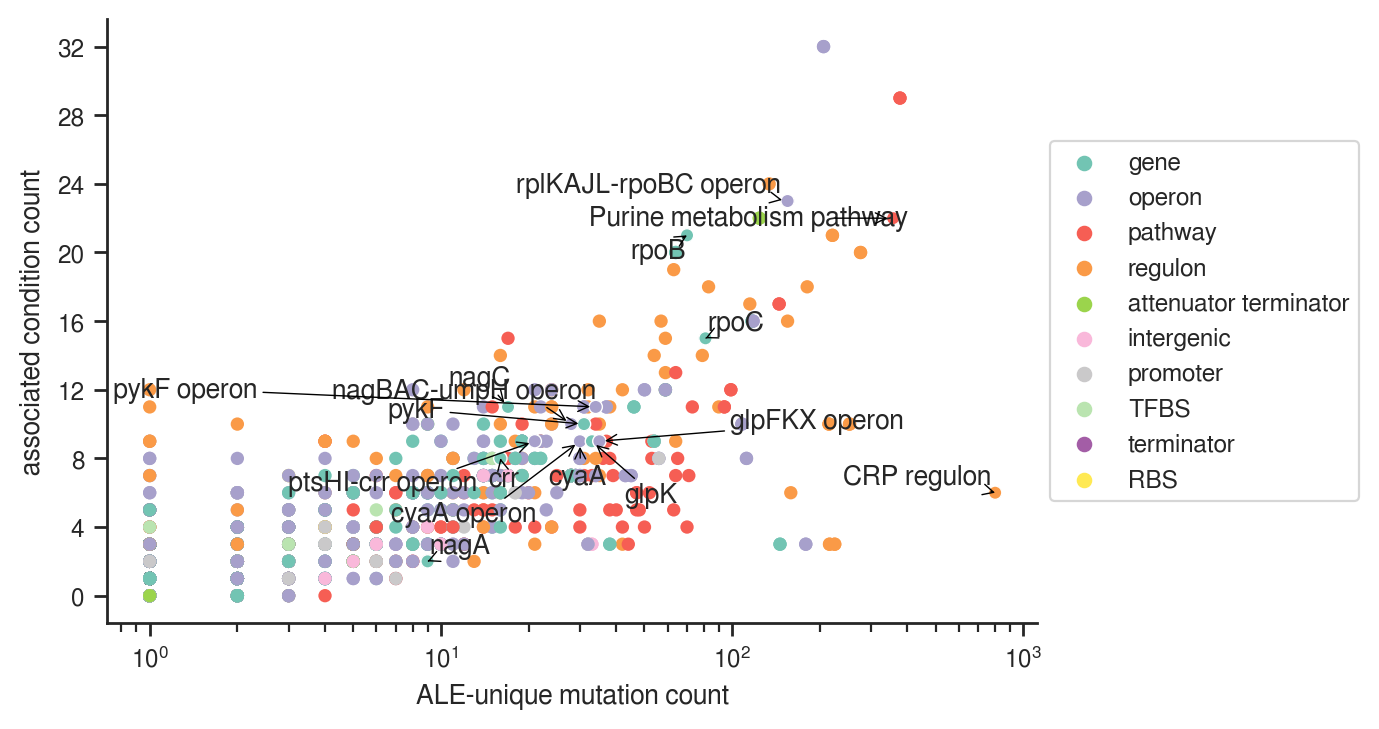

In [21]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from adjustText import adjust_text
from matplotlib.ticker import MaxNLocator
%matplotlib inline
plt.rcParams["figure.dpi"] = 200
sns.set_context("paper")
sns.set_style("ticks")
plt.rcParams['font.sans-serif'] = ["FreeSans"]


X_AXIS = "ALE-unique mutation count"
# X_AXIS = "average convergence"

# plt.figure(figsize=(4,3.5))
ax = sns.scatterplot(
    data=mat,
    x=X_AXIS,
    y="associated condition count",
    hue="feature type",
#     size="95th percentile\nmutation frequency\nfor feature type",
#     size="ALE-unique mutation count",
    linewidth=0,
#     alpha=0.8,
#     sizes={0:10, 1:100},
#     sizes=(1, 100),
    palette=p,
    legend="full"
)

# To get the high-percentile dots plotted on the foreground
sns.scatterplot(
    data=mat[mat["95th percentile\nmutation frequency\nfor feature type"]==1],
    x=X_AXIS,
    y="associated condition count",
    hue="feature type",
#     size="95th percentile\nmutation frequency\nfor feature type",
    linewidth=0,
#     alpha=0.8,
#     sizes={0:10, 1:100},
    palette=p,
    legend=False
)

# To get the annotated dots of interest plotted on the foreground
sns.scatterplot(
    data=annot_df,
    x=X_AXIS,
    y="associated condition count",
    hue="feature type",
#     size="95th percentile\nmutation frequency\nfor feature type",
    linewidth=0.5,
#     alpha=0.8,
#     sizes={0:10, 1:100},
    palette=p,
    legend=False
)

if X_AXIS == "ALE-unique mutation count":
    plt.xscale('log')


texts = []
for x, y, s in zip(annot_df[X_AXIS].tolist(),
                   annot_df["associated condition count"].tolist(),
                   annot_df["annot"].tolist()):
    texts.append(plt.text(x, y, s))

adjust_text(texts,
            arrowprops=dict(arrowstyle="->", color='black', lw=0.5),
            force_points=((0.5, 0.5)),
            force_text=((0.5, 0.5))
           )

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
sns.despine(ax=ax, top=True, right=True, left=False, bottom=False)
ax.yaxis.set_major_locator(MaxNLocator(integer=True))

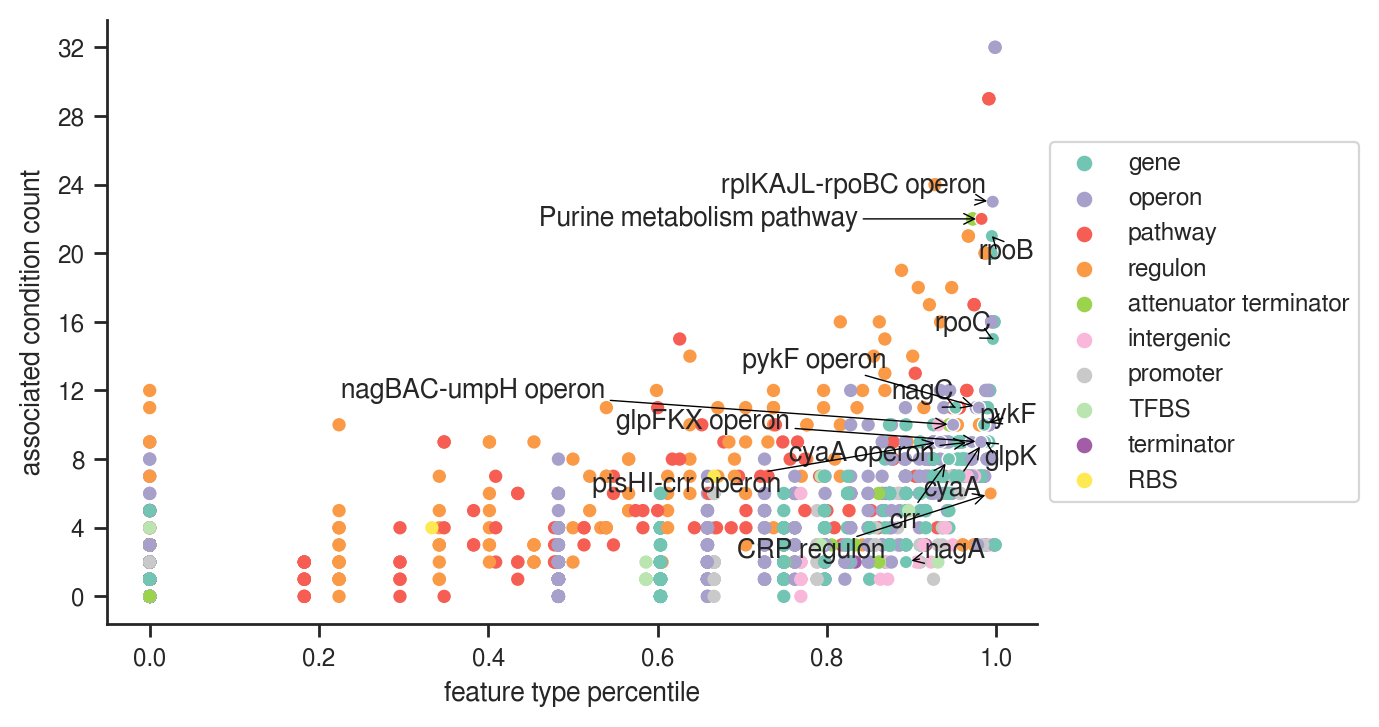

In [22]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from adjustText import adjust_text
%matplotlib inline
plt.rcParams["figure.dpi"] = 200
# sns.set_palette("deep")
sns.set_context("paper")
sns.set_style("ticks")
plt.rcParams['font.sans-serif'] = ["FreeSans"]


X_AXIS = "feature type percentile"
# X_AXIS = "average convergence"

# plt.figure(figsize=(4,3.5))
ax = sns.scatterplot(
    data=mat,
    x=X_AXIS,
    y="associated condition count",
    hue="feature type",
#     size="95th percentile\nmutation frequency\nfor feature type",
#     size="ALE-unique mutation count",
    linewidth=0,
#     alpha=0.8,
#     sizes={0:10, 1:100},
#     sizes=(1, 100),
    palette=p,
    legend="full"
)

# To get the high-percentile dots plotted on the foreground
sns.scatterplot(
    data=mat[mat["95th percentile\nmutation frequency\nfor feature type"]==1],
    x=X_AXIS,
    y="associated condition count",
    hue="feature type",
#     size="95th percentile\nmutation frequency\nfor feature type",
    linewidth=0,
#     alpha=0.8,
#     sizes={0:10, 1:100},
    palette=p,
    legend=False
)

# To get the annotated dots of interest plotted on the foreground
sns.scatterplot(
    data=annot_df,
    x=X_AXIS,
    y="associated condition count",
    hue="feature type",
#     size="95th percentile\nmutation frequency\nfor feature type",
    linewidth=0.5,
#     alpha=0.8,
#     sizes={0:10, 1:100},
    palette=p,
    legend=False
)

if X_AXIS == "ALE-unique mutation count":
    plt.xscale('log')


texts = []
for x, y, s in zip(annot_df[X_AXIS].tolist(),
                   annot_df["associated condition count"].tolist(),
                   annot_df["annot"].tolist()):
    texts.append(plt.text(x, y, s))

repel_force = 0.25
adjust_text(texts,
            arrowprops=dict(arrowstyle="->", color='black', lw=0.5),
            force_points=((repel_force, repel_force)),
            force_text=((repel_force, repel_force))
           )

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
sns.despine(ax=ax, top=True, right=True, left=False, bottom=False)
ax.yaxis.set_major_locator(MaxNLocator(integer=True))

Text(0.5, 42.83333333333333, 'average ALE experiment convergence')

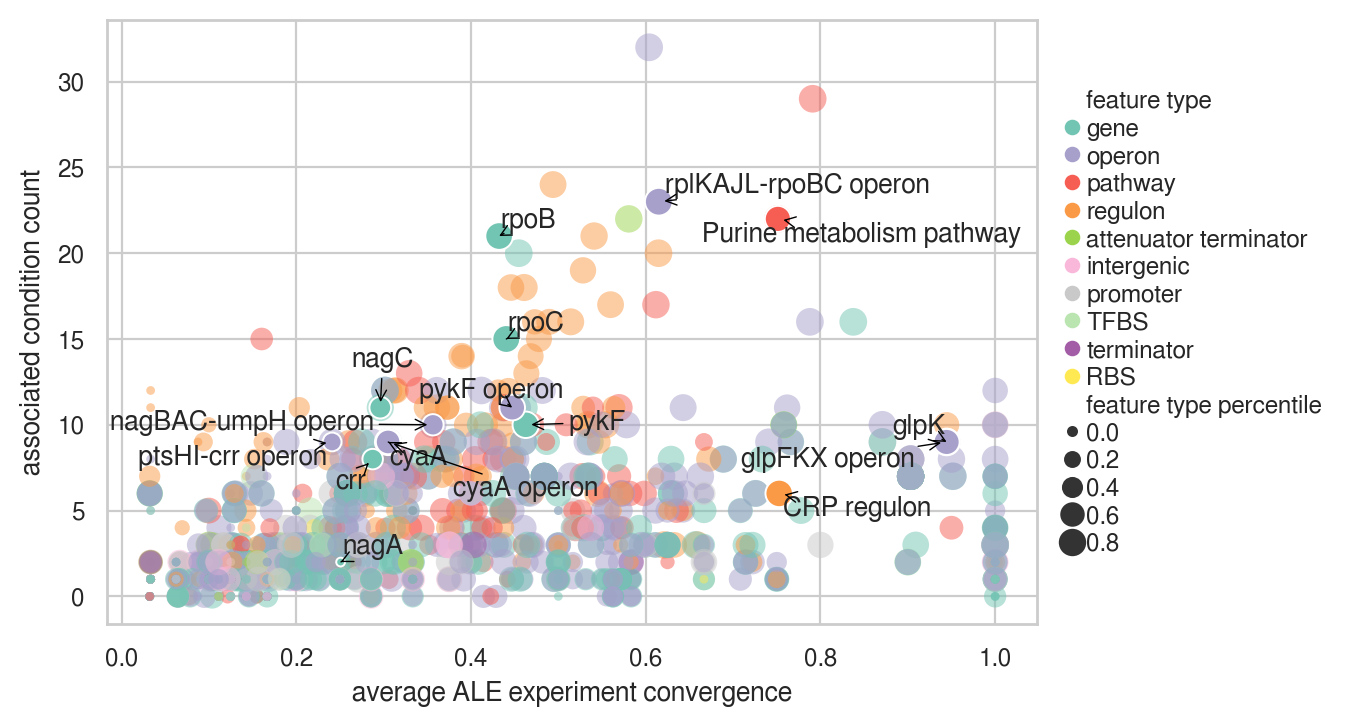

In [23]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from adjustText import adjust_text
%matplotlib inline
plt.rcParams["figure.dpi"] = 200
# sns.set_palette("deep")
sns.set_context("paper")
sns.set_style("whitegrid")
plt.rcParams['font.sans-serif'] = ["FreeSans"]


# X_AXIS = "ALE-unique mutation count"
X_AXIS = "average convergence"
# X_AXIS = "feature type percentile"
Y_AXIS = "associated condition count"
SIZE = "feature type percentile"
# SIZE = "average convergence"
sizes = (10,100)

# plt.figure(figsize=(10,7))
ax = sns.scatterplot(
    data=mat,
    x=X_AXIS,
    y=Y_AXIS,
    hue="feature type",
    size=SIZE,
    linewidth=0,
    alpha=0.5,
    sizes=sizes,
    palette=p,
#     legend="full"
)

# # To get the high-percentile dots plotted on the foreground
# sns.scatterplot(
#     data=mat[mat["95th percentile\nmutation frequency\nfor feature type"]==1],
#     x=X_AXIS,
#     y="associated condition count",
#     hue="feature type",
#     size="95th percentile\nmutation frequency\nfor feature type",
#     linewidth=0,
# #     alpha=0.8,
#     sizes={0:10, 1:100},
#     palette=p,
#     legend=False
# )

# To get the annotated dots of interest plotted on the foreground
sns.scatterplot(
    data=annot_df,
    x=X_AXIS,
    y=Y_AXIS,
    hue="feature type",
    size=SIZE,
    linewidth=0.7,
    alpha=1,
    sizes=sizes,
    palette=p,
    legend=False,
)

if X_AXIS == "ALE-unique mutation count":
    plt.xscale('log')


texts = []
for x, y, s in zip(annot_df[X_AXIS].tolist(),
                   annot_df[Y_AXIS].tolist(),
                   annot_df["annot"].tolist()):
    texts.append(plt.text(x, y, s))

adjust_text(texts,
            arrowprops=dict(arrowstyle="->", color='black', lw=0.5),
            force_points=((0.5, 0.5)),
            force_text=((0.5, 0.5))
           )

plt.rcParams['legend.handlelength'] = 1
plt.rcParams['legend.handleheight'] = 1.125
plt.rcParams['legend.handletextpad'] = 0.1
plt.rcParams['legend.labelspacing'] = 0.1
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=False)
# sns.despine(ax=ax, top=True, right=True, left=False, bottom=False)
ax.set_xlabel("average ALE experiment convergence")
# ax.yaxis.set_major_locator(MaxNLocator(integer=True))

Text(0.5, 42.83333333333333, 'average ALE experiment convergence')

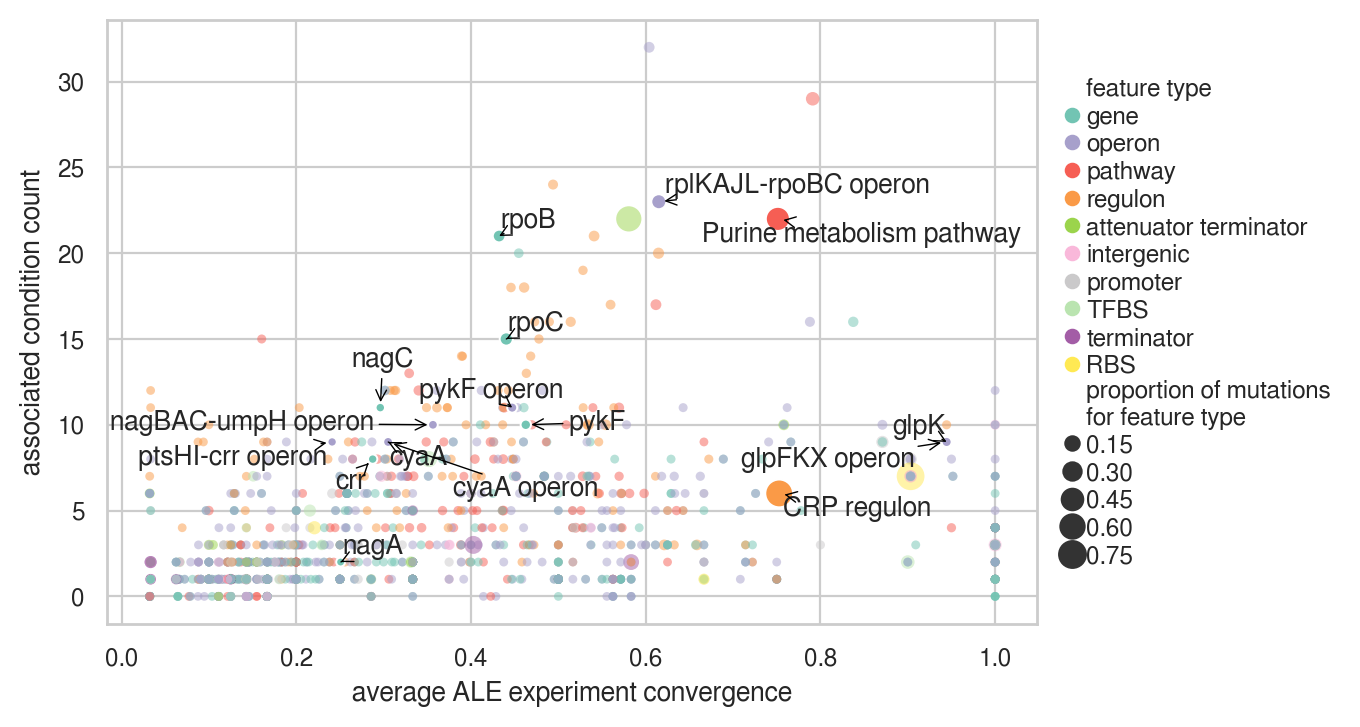

In [24]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from adjustText import adjust_text
%matplotlib inline
plt.rcParams["figure.dpi"] = 200
# sns.set_palette("deep")
sns.set_context("paper")
sns.set_style("whitegrid")
plt.rcParams['font.sans-serif'] = ["FreeSans"]


X_AXIS = "average convergence"
Y_AXIS = "associated condition count"
SIZE = "proportion of mutations\nfor feature type"
sizes = (10,100)

# plt.figure(figsize=(10,7))
ax = sns.scatterplot(
    data=mat,
    x=X_AXIS,
    y=Y_AXIS,
    hue="feature type",
    size=SIZE,
    linewidth=0,
    alpha=0.5,
    sizes=sizes,
    palette=p,
#     legend="full"
)

# # To get the high-percentile dots plotted on the foreground
# sns.scatterplot(
#     data=mat[mat["95th percentile\nmutation frequency\nfor feature type"]==1],
#     x=X_AXIS,
#     y="associated condition count",
#     hue="feature type",
#     size="95th percentile\nmutation frequency\nfor feature type",
#     linewidth=0,
# #     alpha=0.8,
#     sizes={0:10, 1:100},
#     palette=p,
#     legend=False
# )

# To get the annotated dots of interest plotted on the foreground
sns.scatterplot(
    data=annot_df,
    x=X_AXIS,
    y=Y_AXIS,
    hue="feature type",
    size=SIZE,
    linewidth=0.7,
    alpha=1,
    sizes=sizes,
    palette=p,
    legend=False,
)

if X_AXIS == "ALE-unique mutation count":
    plt.xscale('log')


texts = []
for x, y, s in zip(annot_df[X_AXIS].tolist(),
                   annot_df[Y_AXIS].tolist(),
                   annot_df["annot"].tolist()):
    texts.append(plt.text(x, y, s))

adjust_text(texts,
            arrowprops=dict(arrowstyle="->", color='black', lw=0.5),
            force_points=((0.5, 0.5)),
            force_text=((0.5, 0.5))
           )

plt.rcParams['legend.handlelength'] = 1
plt.rcParams['legend.handleheight'] = 1.125
plt.rcParams['legend.handletextpad'] = 0.1
plt.rcParams['legend.labelspacing'] = 0.1
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=False)
# sns.despine(ax=ax, top=True, right=True, left=False, bottom=False)
ax.set_xlabel("average ALE experiment convergence")
# ax.yaxis.set_major_locator(MaxNLocator(integer=True))

Text(82.45833333333333, 0.5, 'average ALE experiment convergence')

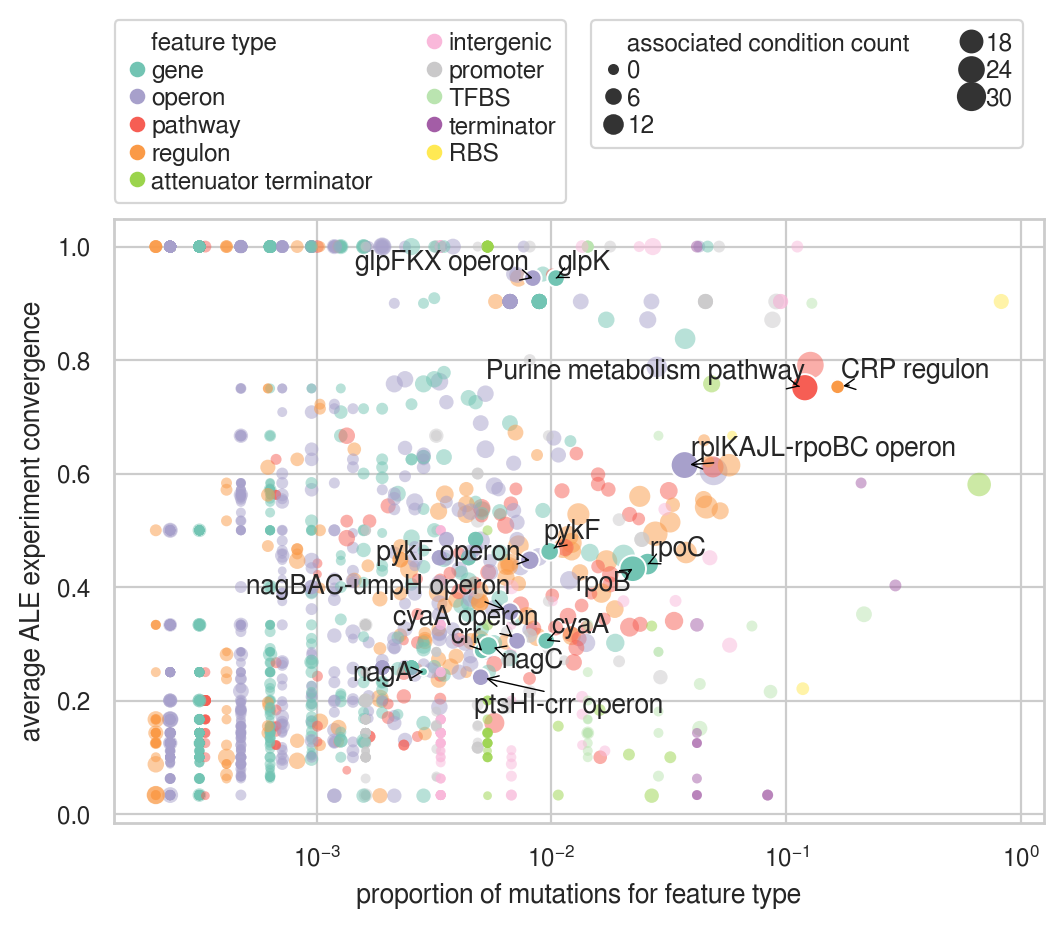

In [25]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from adjustText import adjust_text
%matplotlib inline
plt.rcParams["figure.dpi"] = 200
# sns.set_palette("deep")
sns.set_context("paper")
sns.set_style("whitegrid")
plt.rcParams['font.sans-serif'] = ["FreeSans"]


Y_AXIS = "average convergence"
X_AXIS = "proportion of mutations\nfor feature type"
SIZE = "associated condition count"
sizes = (10,100)

# plt.figure(figsize=(10,7))
ax = sns.scatterplot(
    data=mat,
    x=X_AXIS,
    y=Y_AXIS,
    hue="feature type",
    size=SIZE,
    linewidth=0,
    alpha=0.5,
    sizes=sizes,
    palette=p,
#     legend="full"
)


# To get the annotated dots of interest plotted on the foreground
sns.scatterplot(
    data=annot_df,
    x=X_AXIS,
    y=Y_AXIS,
    hue="feature type",
    size=SIZE,
    linewidth=0.7,
    alpha=1,
    sizes=sizes,
    palette=p,
    legend=False,
)


plt.xscale('log')


texts = []
for x, y, s in zip(annot_df[X_AXIS].tolist(),
                   annot_df[Y_AXIS].tolist(),
                   annot_df["annot"].tolist()):
    texts.append(plt.text(x, y, s))

adjust_text(texts,
            arrowprops=dict(arrowstyle="->", color='black', lw=0.5),
            force_points=((0.75, 0.75)),
            force_text=((0.5, 0.5))
           )

plt.rcParams['legend.handlelength'] = 1
plt.rcParams['legend.handleheight'] = 1.125
plt.rcParams['legend.handletextpad'] = 0.1
plt.rcParams['legend.labelspacing'] = 0.1

handles, labels = ax.get_legend_handles_labels()
l1 = ax.legend(
    handles[:11],
    labels[:11],
    ncol=2,
    loc='upper right',
    bbox_to_anchor=(0.5, 1.35),
    frameon=True
)
l2 = ax.legend(
    handles[11:],
    labels[11:],
    ncol=2,
    loc='upper left',
    bbox_to_anchor=(0.5, 1.35),
    frameon=True
)
ax.add_artist(l1)

# ax.legend(
#     loc='center left',
#     bbox_to_anchor=(1, 0.5),
#     frameon=False,
# )
# ax.legend(loc=5, bbox_to_anchor=(1, 0.5), frameon=False)
ax.set_xlabel(X_AXIS.replace("\n", ' '))
ax.set_ylabel("average ALE experiment convergence")

Text(82.45833333333333, 0.5, 'average ALE experiment convergence')

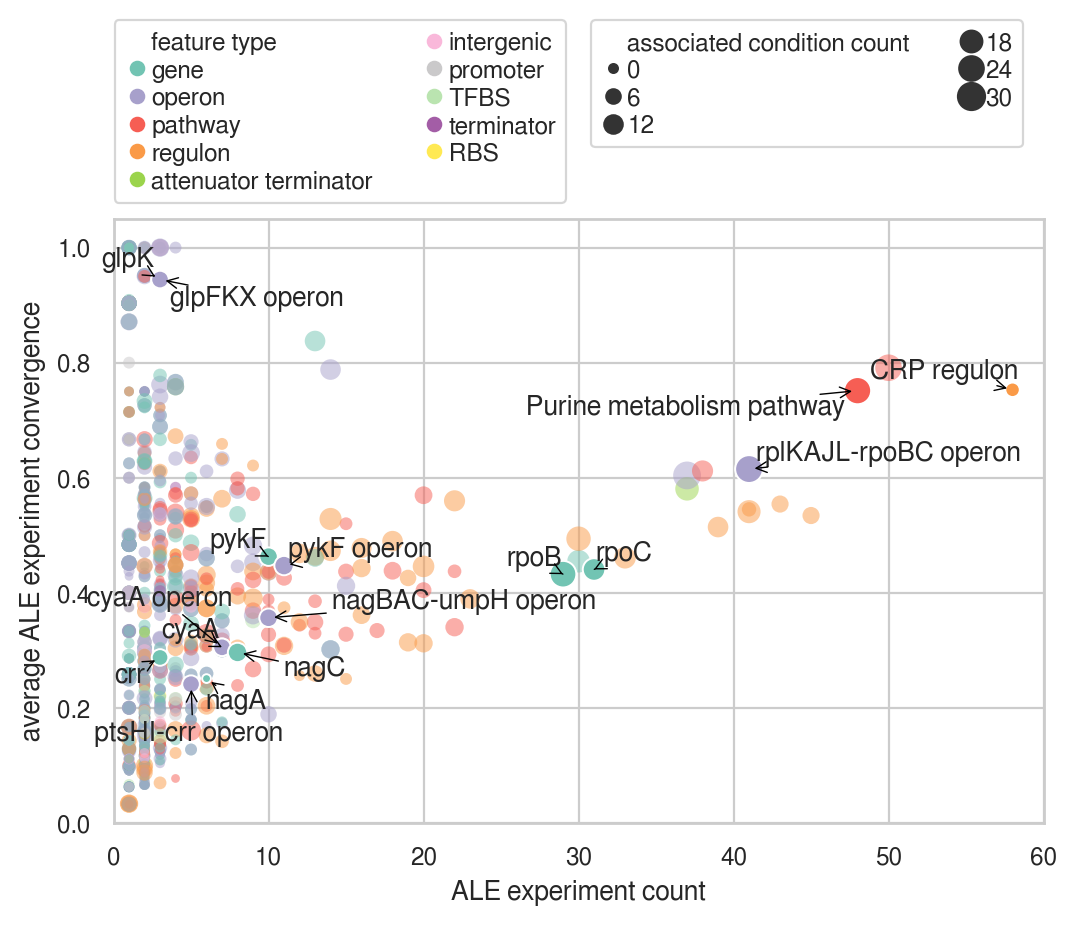

In [26]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from adjustText import adjust_text
%matplotlib inline
plt.rcParams["figure.dpi"] = 200
# sns.set_palette("deep")
sns.set_context("paper")
sns.set_style("whitegrid")
plt.rcParams['font.sans-serif'] = ["FreeSans"]


Y_AXIS = "average convergence"
X_AXIS = "experiment count"
SIZE = "associated condition count"
sizes = (10,100)


plt.figure(figsize=(6,4))
ax = sns.scatterplot(
    data=mat,
    x=X_AXIS,
    y=Y_AXIS,
    hue="feature type",
    size=SIZE,
    linewidth=0,
    alpha=0.5,
    sizes=sizes,
    palette=p,
#     legend="full"
)


# To get the annotated dots of interest plotted on the foreground
sns.scatterplot(
    data=annot_df,
    x=X_AXIS,
    y=Y_AXIS,
    hue="feature type",
    size=SIZE,
    linewidth=0.7,
    alpha=1,
    sizes=sizes,
    palette=p,
    legend=False,
)

# plt.xscale('log')

texts = []
for x, y, s in zip(annot_df[X_AXIS].tolist(),
                   annot_df[Y_AXIS].tolist(),
                   annot_df["annot"].tolist()):
    texts.append(plt.text(x, y, s))

adjust_text(texts,
            arrowprops=dict(arrowstyle="->", color='black', lw=0.5),
            force_points=((0.75, 0.75)),
            force_text=((0.5, 0.5))
           )

plt.rcParams['legend.handlelength'] = 1
plt.rcParams['legend.handleheight'] = 1.125
plt.rcParams['legend.handletextpad'] = 0.1
plt.rcParams['legend.labelspacing'] = 0.1

handles, labels = ax.get_legend_handles_labels()
l1 = ax.legend(
    handles[:11],
    labels[:11],
    ncol=2,
    loc='upper right',
    bbox_to_anchor=(0.5, 1.35),
    frameon=True
)
l2 = ax.legend(
    handles[11:],
    labels[11:],
    ncol=2,
    loc='upper left',
    bbox_to_anchor=(0.5, 1.35),
    frameon=True
)
ax.add_artist(l1)
ax.set_xlim([0,60])
ax.set_ylim([0,1.05])
ax.set_xlabel("ALE experiment count")
ax.set_ylabel("average ALE experiment convergence")
# plt.savefig("../figs/gdmuts_f4.svg", format="svg", bbox_inches='tight')

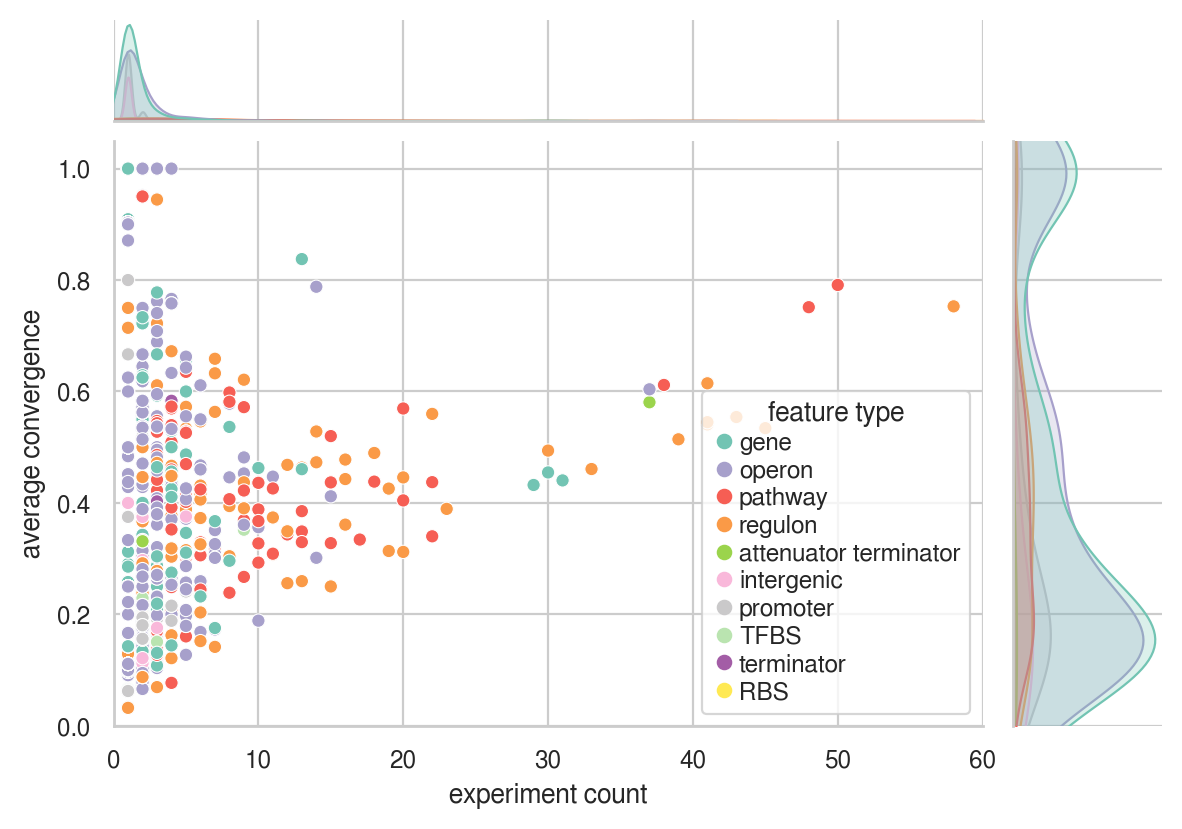

In [27]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from adjustText import adjust_text
%matplotlib inline
plt.rcParams["figure.dpi"] = 200
# sns.set_palette("deep")
sns.set_context("paper")
sns.set_style("whitegrid")
plt.rcParams['font.sans-serif'] = ["FreeSans"]


Y_AXIS = "average convergence"
X_AXIS = "experiment count"
SIZE = "associated condition count"
# sizes = (10,100)

# plt.figure(figsize=(6,4))
jointgrid = sns.jointplot(
    data=mat,
    x=X_AXIS,
    y=Y_AXIS,
    hue="feature type",
    palette=p,
)
jointgrid.ax_joint.set_xlim([0,60])
jointgrid.ax_joint.set_ylim([0,1.05])
jointgrid.fig.set_figwidth(6)
jointgrid.fig.set_figheight(4)

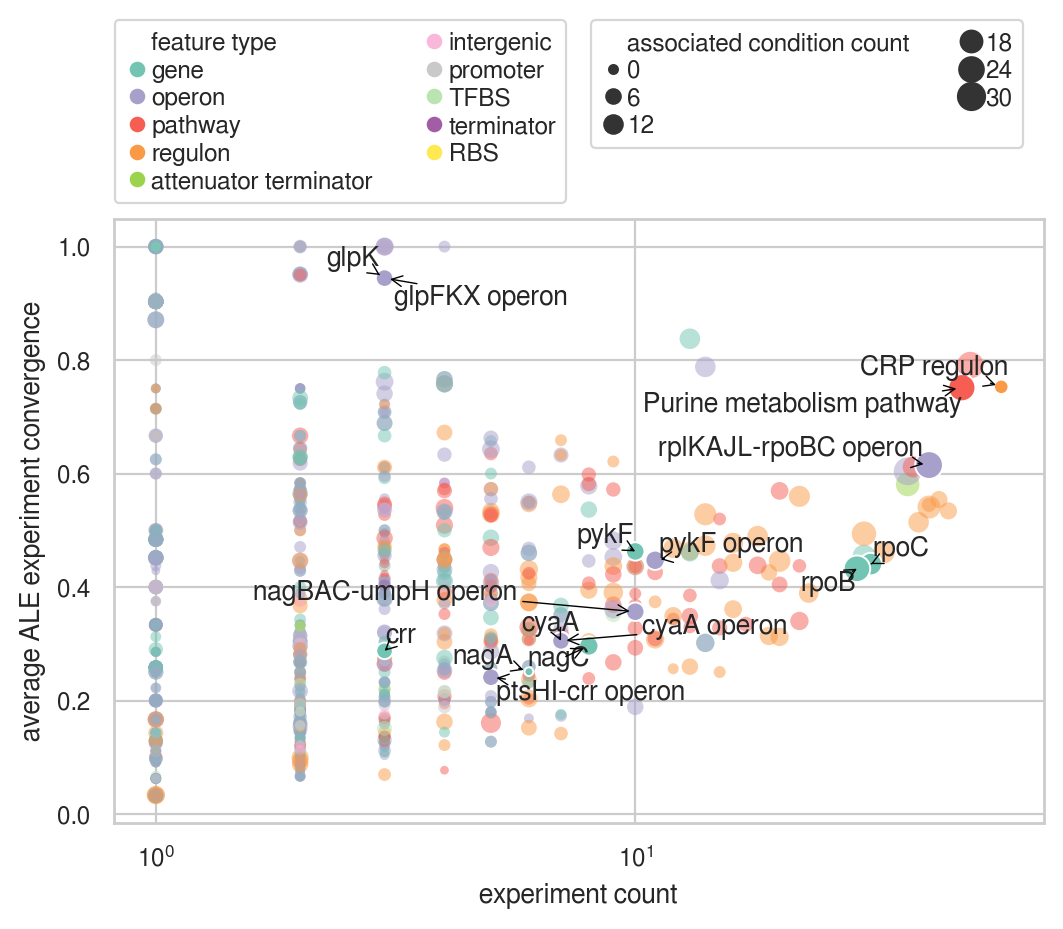

In [28]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from adjustText import adjust_text
%matplotlib inline
plt.rcParams["figure.dpi"] = 200
# sns.set_palette("deep")
sns.set_context("paper")
sns.set_style("whitegrid")
plt.rcParams['font.sans-serif'] = ["FreeSans"]


Y_AXIS = "average convergence"
X_AXIS = "experiment count"
SIZE = "associated condition count"
sizes = (10,100)

# plt.figure(figsize=(10,7))
ax = sns.scatterplot(
    data=mat,
    x=X_AXIS,
    y=Y_AXIS,
    hue="feature type",
    size=SIZE,
    linewidth=0,
    alpha=0.5,
    sizes=sizes,
    palette=p,
#     legend="full"
)


# To get the annotated dots of interest plotted on the foreground
sns.scatterplot(
    data=annot_df,
    x=X_AXIS,
    y=Y_AXIS,
    hue="feature type",
    size=SIZE,
    linewidth=0.7,
    alpha=1,
    sizes=sizes,
    palette=p,
    legend=False,
)

plt.xscale('log')

texts = []
for x, y, s in zip(annot_df[X_AXIS].tolist(),
                   annot_df[Y_AXIS].tolist(),
                   annot_df["annot"].tolist()):
    texts.append(plt.text(x, y, s))

adjust_text(texts,
            arrowprops=dict(arrowstyle="->", color='black', lw=0.5),
            force_points=((0.75, 0.75)),
            force_text=((0.5, 0.5))
           )

plt.rcParams['legend.handlelength'] = 1
plt.rcParams['legend.handleheight'] = 1.125
plt.rcParams['legend.handletextpad'] = 0.1
plt.rcParams['legend.labelspacing'] = 0.1

handles, labels = ax.get_legend_handles_labels()
l1 = ax.legend(
    handles[:11],
    labels[:11],
    ncol=2,
    loc='upper right',
    bbox_to_anchor=(0.5, 1.35),
    frameon=True
)
l2 = ax.legend(
    handles[11:],
    labels[11:],
    ncol=2,
    loc='upper left',
    bbox_to_anchor=(0.5, 1.35),
    frameon=True
)
ax.add_artist(l1)
ax.set_xlabel(X_AXIS.replace("\n", ' '))
ax.set_ylabel("average ALE experiment convergence")
plt.savefig("../figs/gdmuts_f5.svg", format="svg", bbox_inches='tight')

In [29]:
# To use to manually check what features have high experiment counts, though low average convergence. Useful for content in gdmuts MS section 2.2.3
mat[((mat["feature type"].isin(['operon','gene','attenuator terminator', 'intergenic', 'promoter', 'terminator', 'TFBS', 'RBS'])) & (mat["experiment count"]>=10))].sort_values(by="experiment count", ascending=True)

,ALE-unique mutation count,average convergence,experiment count,feature type,feature type percentile,associated condition count,95th percentile\nmutation frequency\nfor feature type,proportion of mutations\nfor feature type
nagBAC-umpH operon,28,0.356488,10,operon,0.949106,10,0,0.006668
metY-rimP-nusA-infB-rbfA-truB-rpsO-pnp operon,14,0.188730,10,operon,0.892710,9,0,0.003334
pykF,31,0.462738,10,gene,0.985696,10,1,0.009832
hns operon,31,0.436310,10,operon,0.976616,11,1,0.007383
pykF operon,34,0.447186,11,operon,0.979367,11,1,0.008097
rhsE,117,0.837607,13,gene,0.997399,16,1,0.037108
rpoA,46,0.460567,13,gene,0.989597,11,1,0.014589
icd operon,59,0.301545,14,operon,0.990371,12,1,0.014051
rhsE-ydcD operon,118,0.787982,14,operon,0.994498,16,1,0.028102
icd,59,0.301545,14,gene,0.992198,12,1,0.018712


In [30]:
mat2 = mat.copy()
mat2 = mat2[mat2["feature type"].isin(['gene', 'attenuator terminator', 'intergenic', 'promoter', 'terminator', 'TFBS', 'RBS'])]
mat2["proportion of mutations"] = mat2.apply(lambda r: r["ALE-unique mutation count"]/mat2["ALE-unique mutation count"].sum(), axis=1)
mat2

,ALE-unique mutation count,average convergence,experiment count,feature type,feature type percentile,associated condition count,95th percentile\nmutation frequency\nfor feature type,proportion of mutations\nfor feature type,proportion of mutations
nagA,9,0.250794,6,gene,0.893368,2,0,0.002854,0.002054
clsA,3,0.226190,2,gene,0.749025,1,0,0.000951,0.000685
rph-pyrE attenuator terminator,124,0.580666,37,attenuator terminator,0.972222,22,1,0.663102,0.028298
rph,64,0.454735,30,gene,0.993498,20,1,0.020298,0.014605
rpoC,81,0.440426,31,gene,0.996099,15,1,0.025690,0.018485
...,...,...,...,...,...,...,...,...,...
csrA,1,1.000000,1,gene,0.000000,1,0,0.000317,0.000228
yraK,1,1.000000,1,gene,0.000000,1,0,0.000317,0.000228
tufAp1,1,1.000000,1,promoter,0.000000,1,0,0.001618,0.000228
fusA,1,1.000000,1,gene,0.000000,1,0,0.000317,0.000228


In [31]:
annot_df2 = mat2[mat2.index.isin(design_feats)].copy()
annot_df2["annot"] = annot_df2.index
annot_df2["annot"] = annot_df2.apply(lambda r: r["annot"].replace(" genomic feature", ''), axis=1)
annot_df2

,ALE-unique mutation count,average convergence,experiment count,feature type,feature type percentile,associated condition count,95th percentile\nmutation frequency\nfor feature type,proportion of mutations\nfor feature type,proportion of mutations,annot
nagA,9,0.250794,6,gene,0.893368,2,0,0.002854,0.002054,nagA
rpoC,81,0.440426,31,gene,0.996099,15,1,0.025690,0.018485,rpoC
pykF,31,0.462738,10,gene,0.985696,10,1,0.009832,0.007074,pykF
rpoB,70,0.432239,29,gene,0.994798,21,1,0.022201,0.015974,rpoB
cyaA,30,0.305159,7,gene,0.984395,9,1,0.009515,0.006846,cyaA
glpK,33,0.944444,3,gene,0.986996,9,1,0.010466,0.007531,glpK
crr,16,0.287500,3,gene,0.944083,8,0,0.005075,0.003651,crr
nagC,17,0.296205,8,gene,0.951886,11,1,0.005392,0.003880,nagC


Text(0.5, 40.133333333333326, 'proportion of mutations')

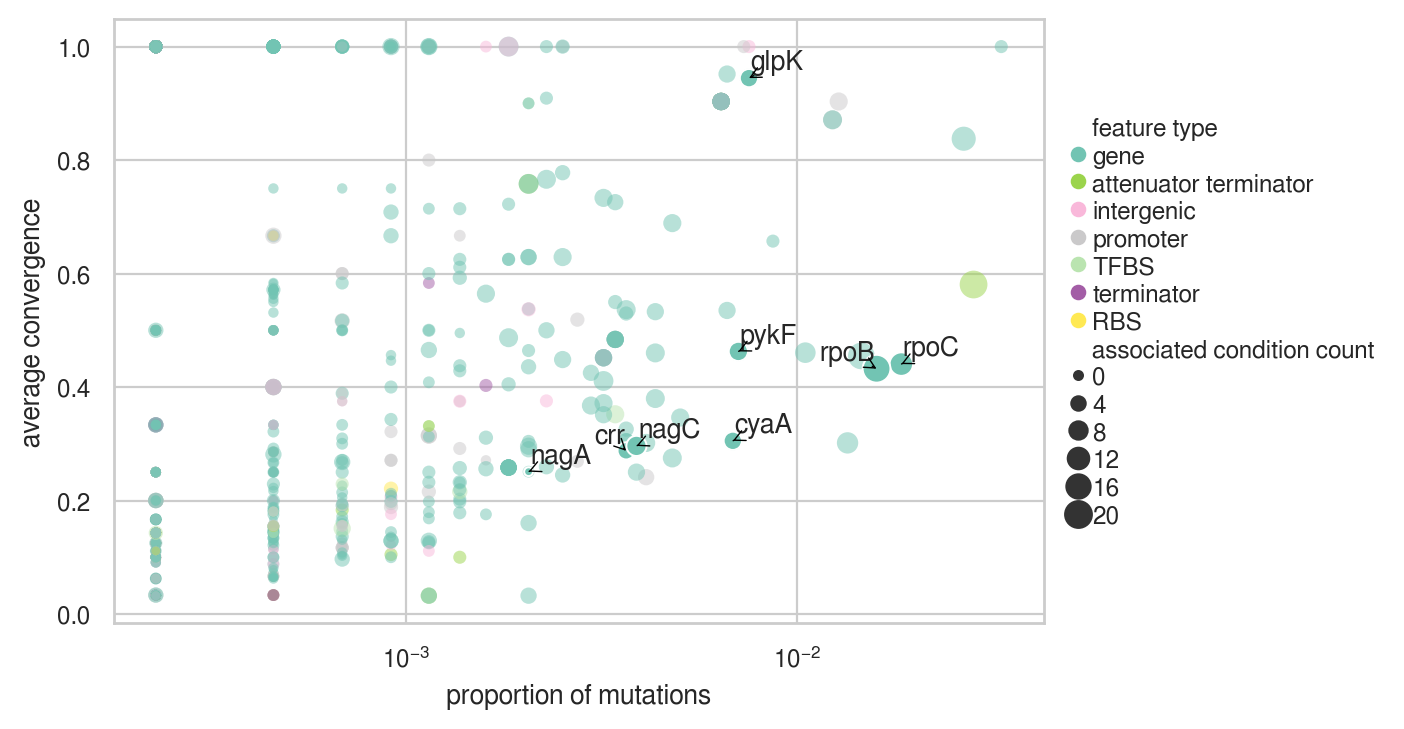

In [32]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from adjustText import adjust_text
%matplotlib inline
plt.rcParams["figure.dpi"] = 200
# sns.set_palette("deep")
sns.set_context("paper")
sns.set_style("whitegrid")
plt.rcParams['font.sans-serif'] = ["FreeSans"]


Y_AXIS = "average convergence"
X_AXIS = "proportion of mutations"
SIZE = "associated condition count"
sizes = (10,100)

# plt.figure(figsize=(10,7))
ax = sns.scatterplot(
    data=mat2,
    x=X_AXIS,
    y=Y_AXIS,
    hue="feature type",
    size=SIZE,
    linewidth=0,
    alpha=0.5,
    sizes=sizes,
    palette=p,
#     legend="full"
)


# To get the annotated dots of interest plotted on the foreground
sns.scatterplot(
    data=annot_df2,
    x=X_AXIS,
    y=Y_AXIS,
    hue="feature type",
    size=SIZE,
    linewidth=0.7,
    alpha=1,
    sizes=sizes,
    palette=p,
    legend=False,
)


plt.xscale('log')


texts = []
for x, y, s in zip(annot_df2[X_AXIS].tolist(),
                   annot_df2[Y_AXIS].tolist(),
                   annot_df2["annot"].tolist()):
    texts.append(plt.text(x, y, s))

adjust_text(texts,
            arrowprops=dict(arrowstyle="->", color='black', lw=0.5),
            force_points=((0.5, 0.5)),
            force_text=((0.5, 0.5))
           )

plt.rcParams['legend.handlelength'] = 1
plt.rcParams['legend.handleheight'] = 1.125
plt.rcParams['legend.handletextpad'] = 0.1
plt.rcParams['legend.labelspacing'] = 0.1
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=False)
# sns.despine(ax=ax, top=True, right=True, left=False, bottom=False)
ax.set_xlabel(X_AXIS.replace("\n", ' '))
# ax.yaxis.set_major_locator(MaxNLocator(integer=True))

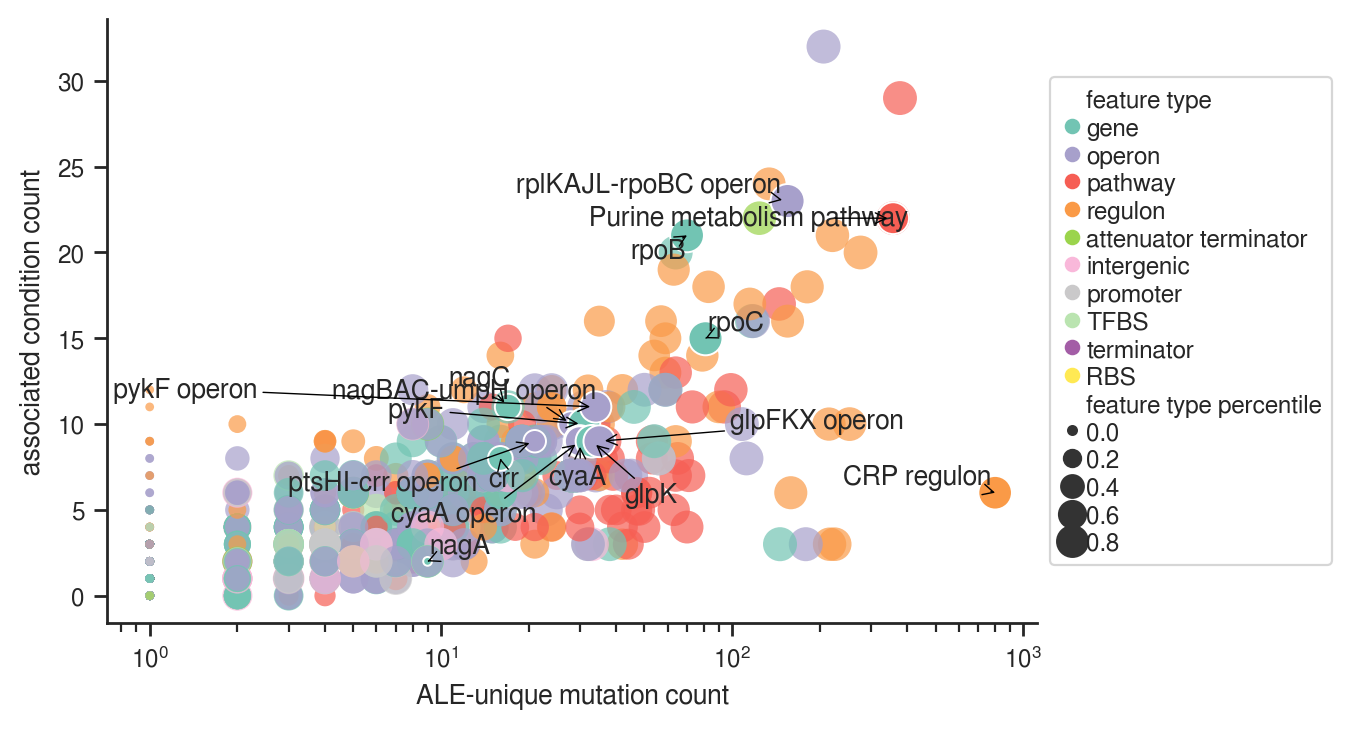

In [33]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from adjustText import adjust_text
%matplotlib inline
plt.rcParams["figure.dpi"] = 200
# sns.set_palette("deep")
sns.set_context("paper")
sns.set_style("ticks")
plt.rcParams['font.sans-serif'] = ["FreeSans"]


X_AXIS = "ALE-unique mutation count"
# X_AXIS = "average convergence"
Y_AXIS = "associated condition count"
SIZE = "feature type percentile"
sizes = (10,150)

# plt.figure(figsize=(4,3.5))
ax = sns.scatterplot(
    data=mat,
    x=X_AXIS,
    y=Y_AXIS,
    hue="feature type",
    size=SIZE,
    linewidth=0,
    alpha=0.7,
    sizes=sizes,
#     sizes={0:10, 1:100},
    palette=p,
#     legend="full"
)

# # To get the high-percentile dots plotted on the foreground
# sns.scatterplot(
#     data=mat[mat["95th percentile\nmutation frequency\nfor feature type"]==1],
#     x=X_AXIS,
#     y="associated condition count",
#     hue="feature type",
#     size="95th percentile\nmutation frequency\nfor feature type",
#     linewidth=0,
# #     alpha=0.8,
#     sizes={0:10, 1:100},
#     palette=p,
#     legend=False
# )

# To get the annotated dots of interest plotted on the foreground
sns.scatterplot(
    data=annot_df,
    x=X_AXIS,
    y=Y_AXIS,
    hue="feature type",
    size=SIZE,
    linewidth=0.7,
    alpha=1,
    sizes=sizes,
#     sizes={0:10, 1:100},
    palette=p,
    legend=False
)

if X_AXIS == "ALE-unique mutation count":
    plt.xscale('log')


texts = []
for x, y, s in zip(annot_df[X_AXIS].tolist(),
                   annot_df[Y_AXIS].tolist(),
                   annot_df["annot"].tolist()):
    texts.append(plt.text(x, y, s))

adjust_text(texts,
            arrowprops=dict(arrowstyle="->", color='black', lw=0.5),
            force_points=((0.5, 0.5)),
            force_text=((0.5, 0.5))
           )

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
sns.despine(ax=ax, top=True, right=True, left=False, bottom=False)
# ax.set_xlabel("average experiment convergence")
# ax.yaxis.set_major_locator(MaxNLocator(integer=True))